In [79]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score, log_loss, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Bad Practices
Common ML methodology mistakes Data Scientists make to address them

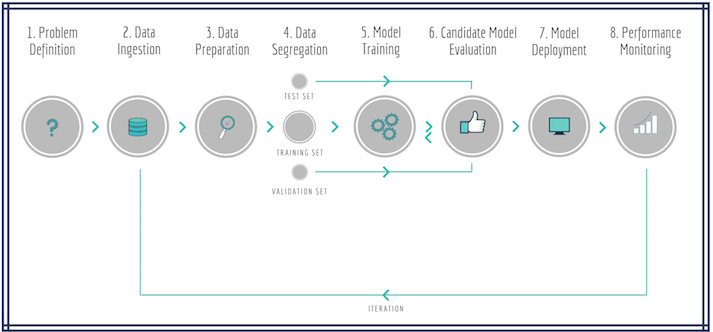
https://towardsdatascience.com/machine-learning-perfection-always-starts-with-mistakes-d2dd50a9f1c7

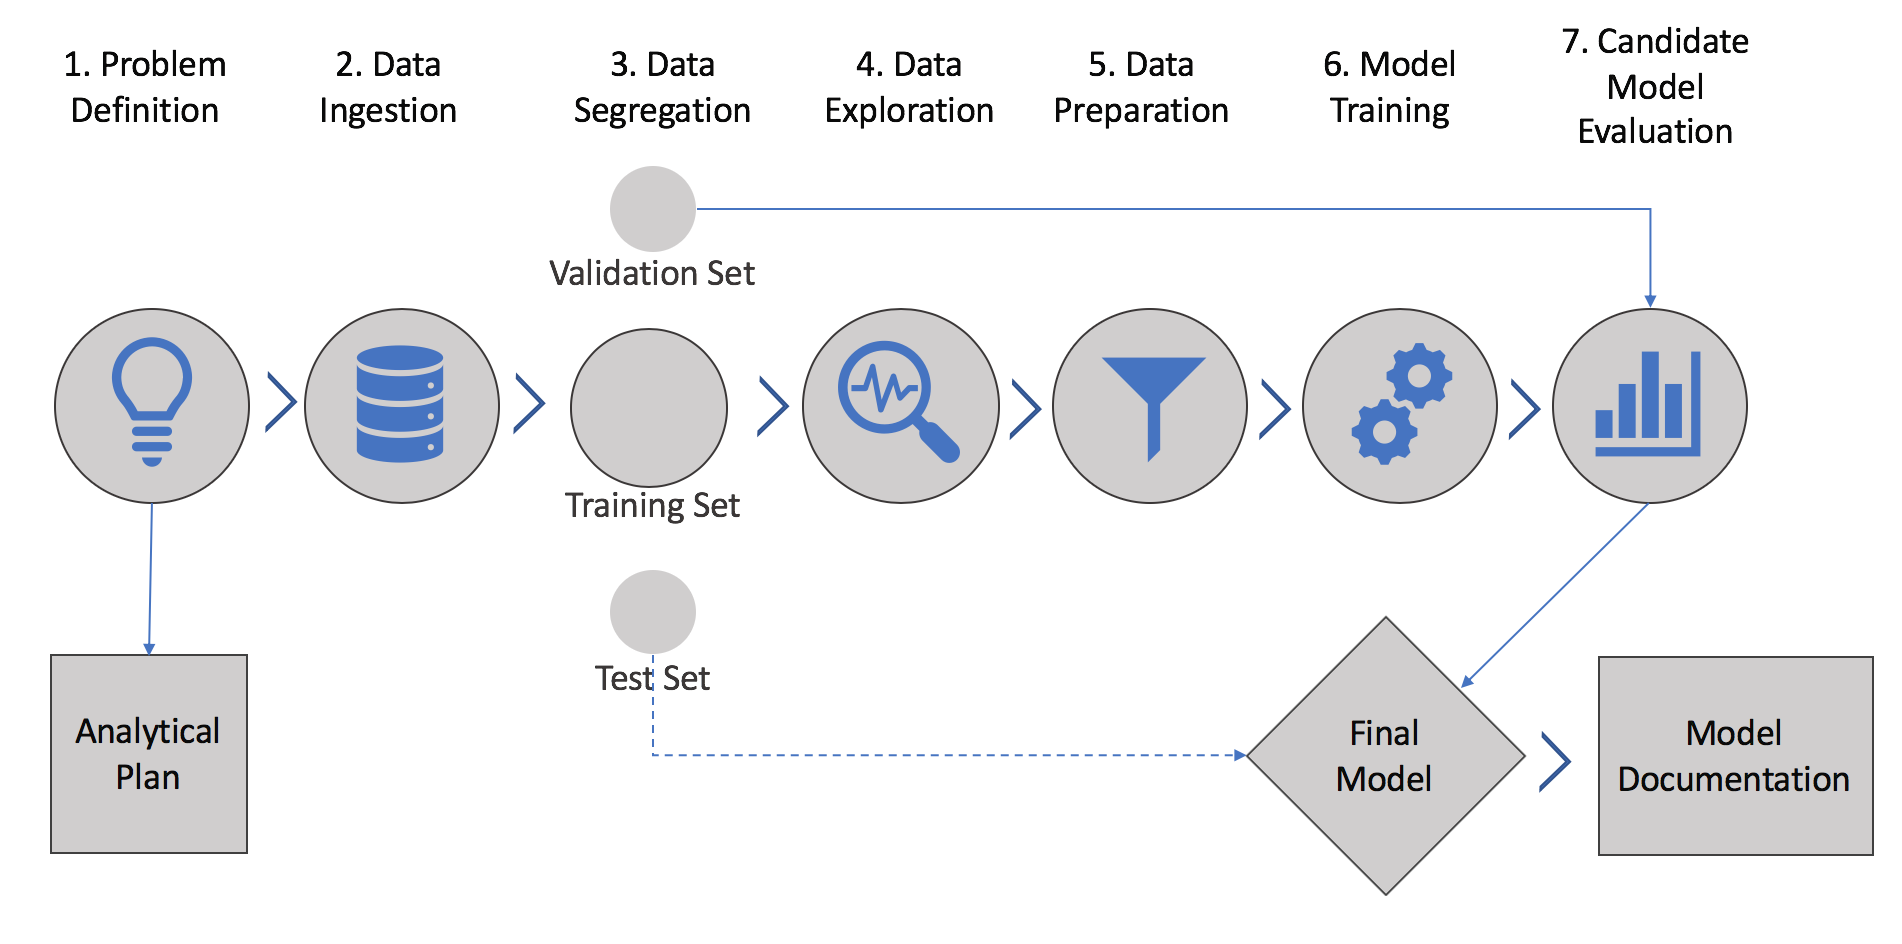

## 1. Problem Definition
Analytical Plan

https://bitbucket.mutualofomaha.com/projects/DDS/repos/dw-event-driven-persistency/browse/project-docs/model/analytical-plan.md?at=refs%2Fheads%2Ffeature%2Fcode-cleanup

## 2. Get the Data

Predicting Cardiovascular Heart Disease

Source: https://www.kaggle.com/ronitf/heart-disease-uci

In [80]:
heart = pd.read_csv('heart.csv')

In [81]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [82]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [84]:
len(heart)

303

### Data Profiling - Understand How Your Data is Populated
https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model

Attribute Information:
* **age**: The person's age in years
* **sex**: The person's sex (1 = male, 0 = female)
* **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
* **chol**: The person's cholesterol measurement in mg/dl
* **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* **thalach**: The person's maximum heart rate achieved
* **exang**: Exercise induced angina (1 = yes; 0 = no)
* **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* **ca**: The number of major vessels (0-3)
* **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* **target**: Heart disease (0 = no, 1 = yes)

In [85]:
heart.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
                 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 
                 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [86]:
heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### What other things should we consider in the data collection step?
* Having an understanding of the timebox of the data
    * What is the beginning and ending timeframe of the data you are collecting?
* Source to Target validation - quality and trust of the data
* Does the data change the problem?
    * Redefine the problem based on the data

## 3. Data Segregation

* **Training Dataset**: The sample of data used to fit the model.
* **Validation Dataset**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration. You can overfit your model to the validation set.
* **Test Dataset**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. This dataset gives the best estimation of how the model will perform in the real world. It is **only used once**.

https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

In [87]:
# split the data into training_validation and testing
X_train_val, X_test, y_train_val, y_test = train_test_split(heart.drop('target', axis=1), heart['target'], 
                                                    test_size = .2, random_state=10) 
# split the data into training and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train_val, y_train_val, 
                                                    test_size = .2, random_state=10) 

In [88]:
len(X_train)/len(heart)

0.636963696369637

In [89]:
len(X_validation)/len(heart)

0.1617161716171617

In [90]:
len(X_test)/len(heart)

0.20132013201320131

In [91]:
X_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3


In [92]:
y_train.head()

220    0
72     1
178    0
57     1
166    0
Name: target, dtype: int64

### What happens if we don't split into training and testing?

In [93]:
# This dataset isn't very large. Let's use a different one so we can quantify the difference
len(heart)

303

Let's look at this credit card default classificaiton problem

Source: Source: https://www.kaggle.com/c/GiveMeSomeCredit/data

In [94]:
credit = pd.read_csv('credit.csv')

In [95]:
credit.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [96]:
credit.rename(columns={'Unnamed: 0':'id'}, inplace=True)

In [97]:
credit.head()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [98]:
len(credit)

150000

In [99]:
# Let's perform train/test split
# X_real_world and y_real_world will represent new data that the model receives
y = credit['SeriousDlqin2yrs']
X = credit.drop('SeriousDlqin2yrs', axis=1)
X_all_data_available, X_real_world, y_all_data_available, y_real_world = train_test_split(X, y, 
                                                                                          test_size=0.3, 
                                                                                          random_state=123)

In [100]:
# Let's perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X_all_data_available, y_all_data_available,
                                                                test_size=0.2, random_state=123)

In [101]:
# Transform the data for input into the model
pipeline = Pipeline(steps=[
    ('impute_mean', ColumnTransformer(transformers=[
                        ('scalar imputing mean', SimpleImputer(strategy='mean'), X_train.columns),
                        ], remainder='drop')),
    ('scale', ColumnTransformer(transformers=[
                        ('scalar scaling', MinMaxScaler(feature_range=(0, 1)), np.arange(0, len(X_train.columns))),
                        ], remainder='drop')),
    ('GBT', GradientBoostingClassifier())
    ])

#### For one model, we will train the model over the entire dataset without evaluating on the test set

In [102]:
all_data_model = pipeline.fit(X_all_data_available, y_all_data_available)

In [103]:
# Estimation of performance in the real world:
accuracy_score(y_all_data_available, all_data_model.predict(X_all_data_available)) * 100

93.83142857142857

In [104]:
average_precision_score(y_all_data_available, all_data_model.predict_proba(X_all_data_available)[:, 1])

0.4028737504286566

#### For the other model, we will train on the training set and evaluate on the test set

In [105]:
split_data_model= pipeline.fit(X_train, y_train)

In [106]:
# Estimation of performance in the real world:
accuracy_score(y_test, split_data_model.predict(X_test)) * 100

93.76666666666667

In [107]:
average_precision_score(y_test, split_data_model.predict_proba(X_test)[:, 1])

0.3781423325396036

#### Which one performed better on the real_world data?


In [108]:
# Without splitting the data
accuracy_score(y_real_world, all_data_model.predict(X_real_world)) * 100

93.69777777777777

In [109]:
average_precision_score(y_real_world, all_data_model.predict_proba(X_real_world)[:, 1])

0.40096223046827806

In [110]:
# Splitting the data
accuracy_score(y_real_world, split_data_model.predict(X_real_world)) * 100

93.69777777777777

In [111]:
average_precision_score(y_real_world, split_data_model.predict_proba(X_real_world)[:, 1])

0.40096223046827806

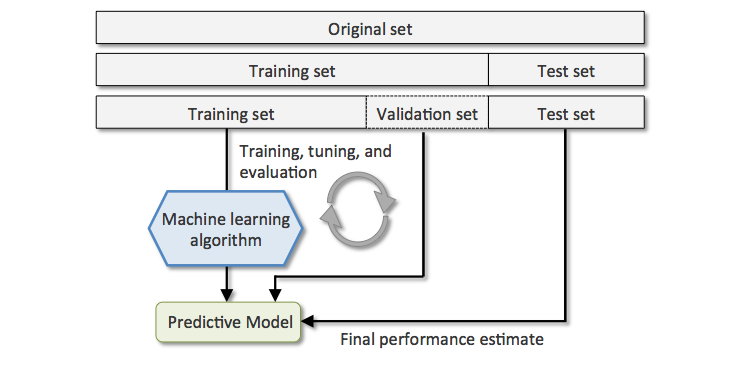

Source: https://medium.com/datadriveninvestor/data-science-essentials-why-train-validation-test-data-b7f7d472dc1f

### What happens after you use the validation set?
Incorporate the validation set into the training set. The validation set is now part of your training data.

### What happens after you use the test set?
Incorporate the test set into the training set. The test data is now part of your training data. Your final model should be evaluated on the test set, then trained over all of the data available to you. The test set is the best estimate for how the model will perform in the real world.

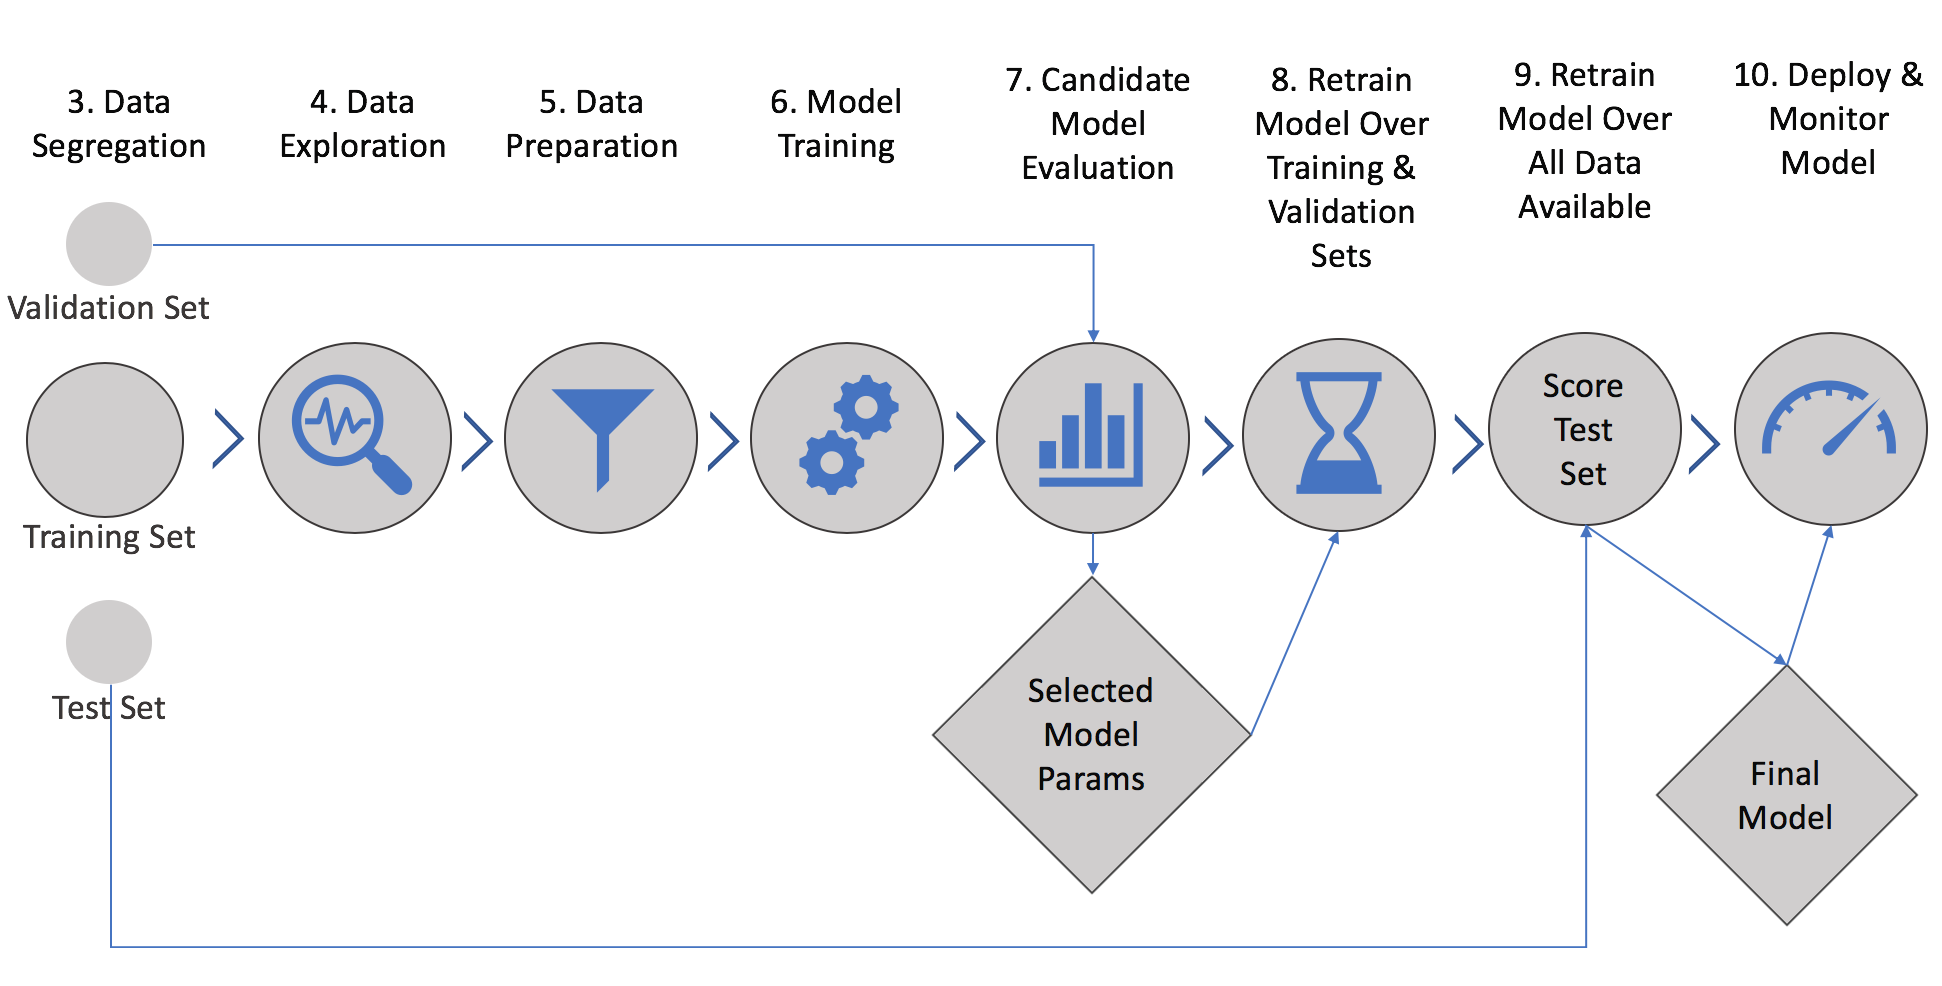

### Avoid Snooping with Time Series Data

What if you are interested in making predictions at different points in time?

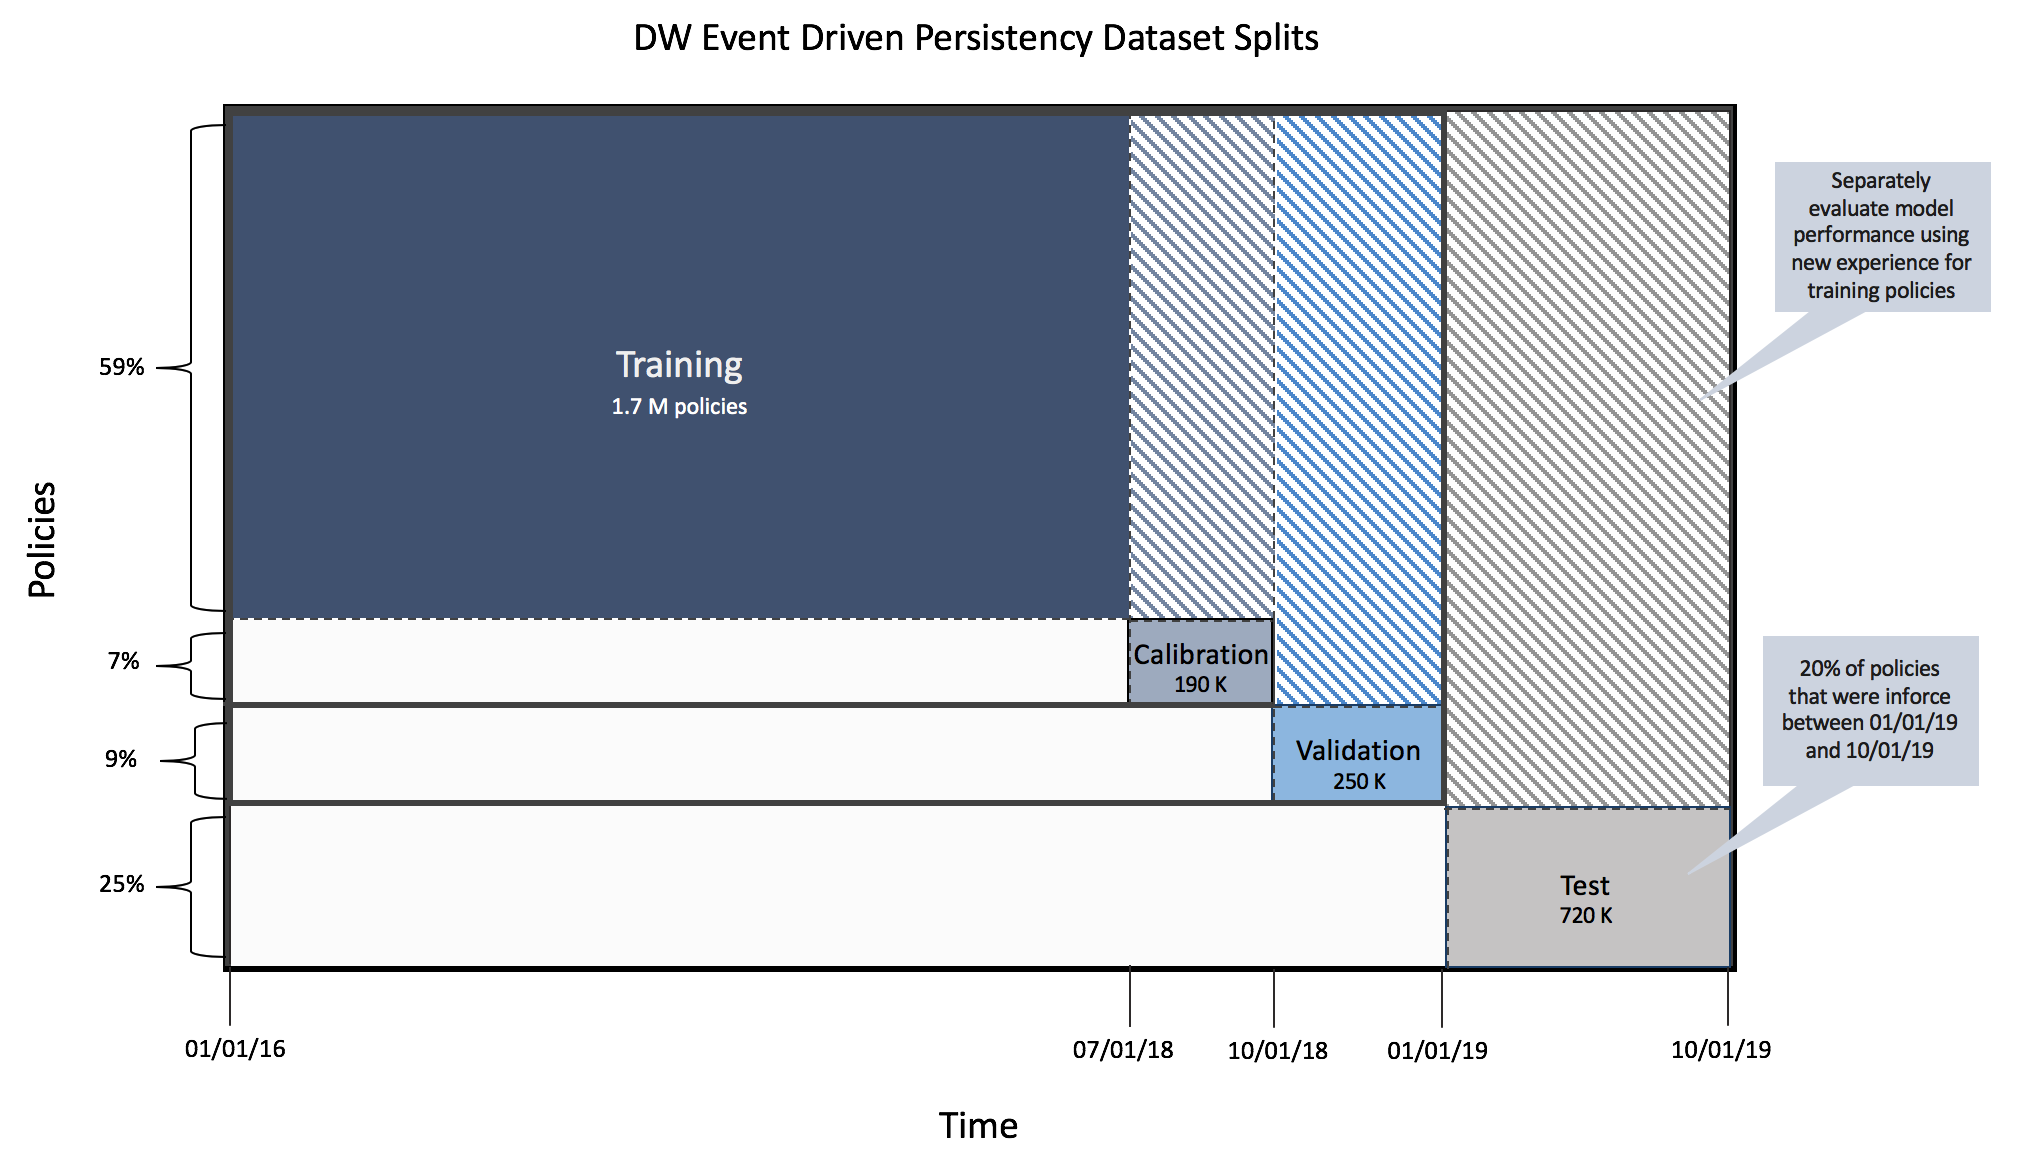

### What other things should we consider when splitting the data?
* Biased models based on small populations of subsets
    * Segment on X vars when you know you have a biased dataset that isn't representative of what you know you will see in the future

## 4. Data Exploration on the Training Set
**Note**: Data exploration should occor after data segregation and should  not be performed on the validation or test set because 

Housing Data Set

Source: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [112]:
houses = pd.read_csv('houses.csv')

In [113]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### What elements are really important to investigate in the data exploration step?
* Outliers
* Nulls
* Missing
* Categorical Data the look numeric
* 

## 5. Data Preparation

### Feature Engineering
Feature engineering should be informed by data understanding and data exploration

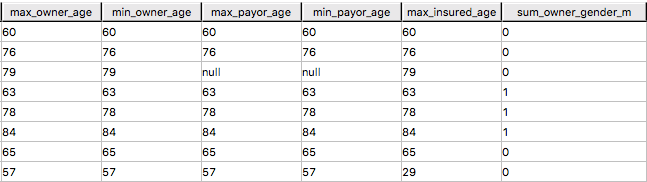

### Treating Missing Values and Scaling
A common technique is to use the mean/median/mode for continuous variables and to create a MISSING category for categorical variables

In [117]:
gbt_pipeline = Pipeline(steps=[
    ('impute_mean', ColumnTransformer(transformers=[
                        ('scalar imputing mean', SimpleImputer(strategy='mean'), X_train.columns),
                        ], remainder='drop')),
    ('scale', ColumnTransformer(transformers=[
                        ('scalar scaling', MinMaxScaler(feature_range=(0, 1)), np.arange(0, len(X_train.columns))),
                        ], remainder='drop')),
    ('GBT', GradientBoostingClassifier())
    ])

### What other steps should you take care of in a data preperation step?
* Feature Selection
* Address Class Imbalance (if necessary)
* For prob estimates, scale vars - You can't calibrate something that isn't scalable

## 6. Model Training

### Cross Validation

K-Fold Cross Validation

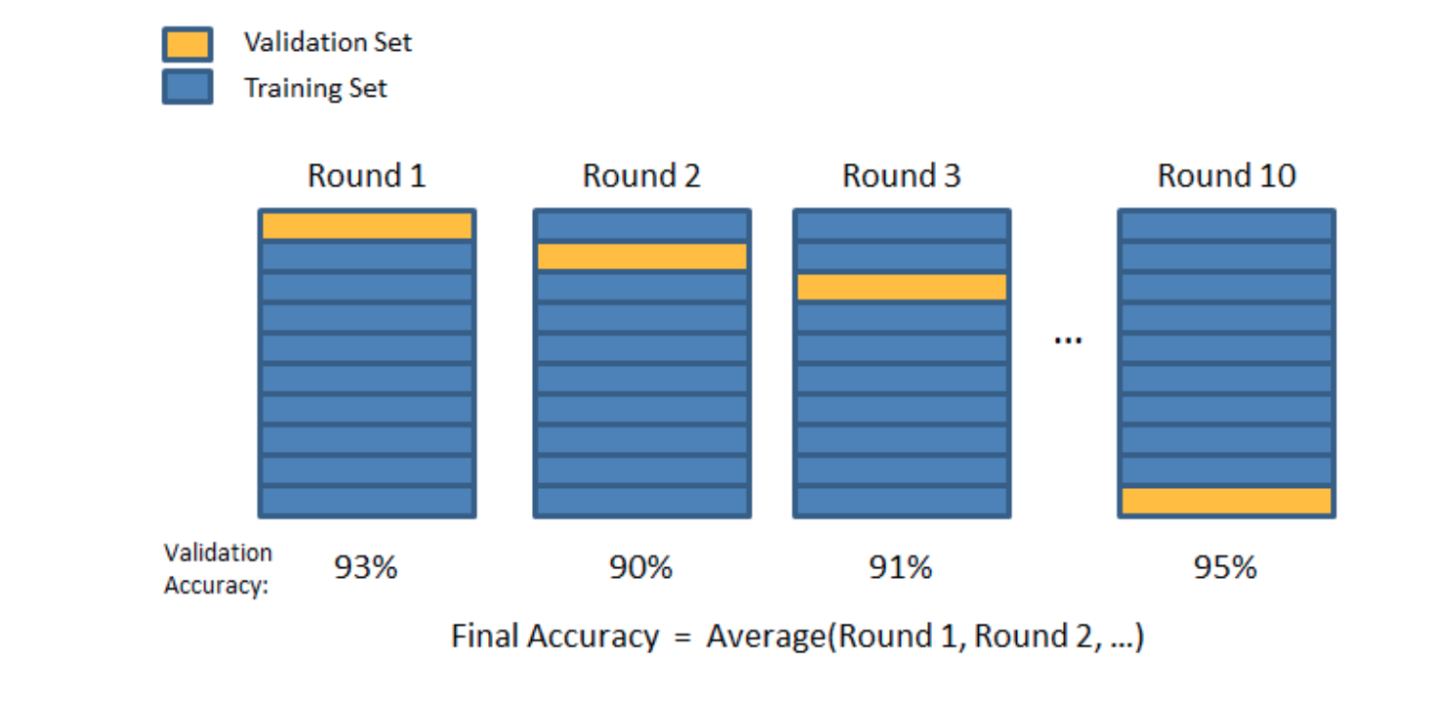

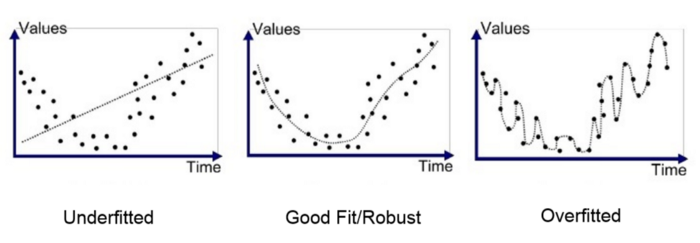

### Grid Search

In [74]:
# Currently only contains default values.  Commented parameters needn't be used
# in a grid search.
dct_grid = {
    'GBT__n_estimators' : [25, 50, 100],
    'GBT__max_depth'    : [2, 5, 9]
}

### Model Tournament

In [123]:
rf_pipeline = Pipeline(steps=[
    ('impute_mean', ColumnTransformer(transformers=[
                        ('scalar imputing mean', SimpleImputer(strategy='mean'), X_train.columns),
                        ], remainder='drop')),
    ('scale', ColumnTransformer(transformers=[
                        ('scalar scaling', MinMaxScaler(feature_range=(0, 1)), np.arange(0, len(X_train.columns))),
                        ], remainder='drop')),
    ('RF', RandomForestClassifier())
    ])

lr_pipeline = Pipeline(steps=[
    ('impute_mean', ColumnTransformer(transformers=[
                        ('scalar imputing mean', SimpleImputer(strategy='mean'), X_train.columns),
                        ], remainder='drop')),
    ('scale', ColumnTransformer(transformers=[
                        ('scalar scaling', MinMaxScaler(feature_range=(0, 1)), np.arange(0, len(X_train.columns))),
                        ], remainder='drop')),
    ('LR', LogisticRegression())
    ])

In [125]:
gbt_grid = {
    'GBT__n_estimators' : [25, 50, 100],
    'GBT__max_depth'    : [2, 5, 9]
}

rf_grid = {
    'RF__n_estimators' : [25, 50, 100],
    'RF__max_depth'    : [2, 5, 9]
}

lr_grid = {
    'LR__penalty' : ['l1', 'l2'],
    'LR__C'    : np.logspace(0, 4, 10)
}

In [126]:
gbt_grid_search = GridSearchCV(gbt_pipeline, gbt_grid, cv=5, return_train_score=False
                   , scoring=['accuracy', 'precision', 'average_precision', 'neg_log_loss']
                   , refit='average_precision', n_jobs=-1 )
gbt_model = gbt_grid_search.fit(X_train, y_train)

In [127]:
rf_grid_search = GridSearchCV(rf_pipeline, rf_grid, cv=5, return_train_score=False
                   , scoring=['accuracy', 'precision', 'average_precision', 'neg_log_loss']
                   , refit='average_precision', n_jobs=-1 )
rf_model = rf_grid_search.fit(X_train, y_train)

In [128]:
lr_grid_search = GridSearchCV(lr_pipeline, lr_grid, cv=5, return_train_score=False
                   , scoring=['accuracy', 'precision', 'average_precision', 'neg_log_loss']
                   , refit='average_precision', n_jobs=-1 )
lr_model = lr_grid_search.fit(X_train, y_train)

/Users/req89250/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 7. Candidate Model Evaluation

In [131]:
# Estimation of performance of GBT on the Validation Set:
average_precision_score(y_validation, gbt_model.predict_proba(X_validation)[:, 1])

0.7615610997189944

In [132]:
# Estimation of performance of RF on the Validation Set:
average_precision_score(y_validation, rf_model.predict_proba(X_validation)[:, 1])

0.7112823781469829

In [133]:
# Estimation of performance of LR on the Validation Set:
average_precision_score(y_validation, lr_model.predict_proba(X_validation)[:, 1])

0.7653129398883189

## 8. Model Documentation

https://bitbucket.mutualofomaha.com/projects/DDS/repos/dw-event-driven-persistency/browse/project-docs/model/model_documentation.md?at=refs%2Fheads%2Ffeature%2Fcode-cleanup

## Putting it all Together

https://bitbucket.mutualofomaha.com/projects/DDS/repos/dw-event-driven-persistency/browse/models/main/cancellation_model/cancellation.ipynb?at=refs%2Fheads%2Ffeature%2Fcode-cleanup

## Other things to consider:
* Use Bitbucket!
* MLFlow is Cool
* Calibrating Model Probabilities

## Resources

* Putting Data Science in Production
* Good Dev Practices: https://www.thoughtworks.com/insights/blog/coding-habits-data-scientists?utm_medium=email&utm_source=topic+optin&utm_campaign=awareness&utm_content=20191120+data+nl&mkt_tok=eyJpIjoiWW1OaU9Ea3hPREUzWmpReSIsInQiOiJVZ2RxeDJYUWY1S2VHeUJCamFTNlhrYzdNWHhNd2hlNkVxTnRnSDZMNUpiNkExM3JBQ1k4ZTh3WDJDeWlyNmM3WGpOakN0M2twSWpoMjdxazN1aUF4ckRrOERyZjAyWnZRXC9MRXJCRFNiRFhTd3FSbFlGRm5yMnR0MnI0Z2pQaFkifQ%3D%3D
* Common Data Mistakes: https://www.geckoboard.com/learn/data-literacy/statistical-fallacies/cobra-effect/